# **Countrywise Life Expectancy + Risks: Exploratory Data Analysis and Regression Models**

###**Descriptions of Fields**

**Part 1 : Obtained from 'Life Expectancy' dataset (WHO)**
(https://www.kaggle.com/kumarajarshi/life-expectancy-who)

- country (Nominal) : Name of the country corresponding indicators are for
- year (Ordinal) : Year the indicators were recorded (range: 2000 to 2015 -- 16 years)
- status (Nominal) : A country is categorised as 'Developed' or 'Developing' as per WHO metrics
- life_expectancy (Ratio) : Life expectancy (in years) for people in a particular country (for a given year)
- adult_mortality (Ratio) : Adult mortality rate (ages 15-60) per 1000 people
- infant_deaths (Ratio) : number of infant deaths per 1000 infants
- alcohol (Ratio) : Alcohol consumption rate of country, recorded per capita consumption (in litres of pure alcohol)
- percentage_expenditure (Ratio) : Expenditure on health as % of country's GDP per capita
- hepatitis_b (Ratio) : Percentage of 1 year olds with Hepatitis B immunization
- measles (Ratio) : # of (reported) cases of Measles per 1000 population
- bmi (Interval/Ordinal) : Average BMI (Body Mass Index) of country's population
- under-five_deaths (Ratio) : # of deaths of children under the age of 5, per 1000 population
- polio (Ratio) : Percentage of 1 year olds with Polio immunization
- total_expenditure (Ratio) : Percentage of total government expenditure towards Health
- diphtheria (Ratio) - Percentage of 1 year olds with Diphtheria tetanus toxoid and pertussis (DTP3) immunization  
- hiv/aids (Ratio) - deaths per 1000 live births caused by HIV/AIDS for children under 5
- gdp (Ratio) - Gross Domestic Product per capita (USD)
- population (Ratio) - Population of a country
- thinness_10-19_years (Ratio) - rate of thinness among people aged 10-19 
- thinness_5-9_years (Ratio) - rate of thinness among children aged 5-9
- income_composition_of_resources (Ratio) - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- schooling (Ratio) - Average number of years of schooling of country's population

<br/>

**Part 2 : Obtained from 'Worldwide deaths by country/risk factors' dataset (WHO)**
(https://www.kaggle.com/varpit94/worldwide-deaths-by-risk-factors)

- Unsafe water source : Total annual number of deaths due to unsafe water source
- Unsafe sanitation : Total annual number of deaths due to unsafe sanitation
```remaining fields follow same trend: annual number of deaths due to <insert risk factor> -- description to-be-continued...```


*(Note: thinness_1-19_years is incorrectly named; must be renamed to thinness_10-19_years)*

### Life expectancy : Statistical measure of number of years an average human is expected to live; mathematically elegant!

### Is Life expectancy measure of choice in aetiological research / identifying risk factors of death? 
From correlation matrix: No
<br/>
Reason: Life Expectancy is a good measure of public health indicators, but estimations of LE are not straightforward since it is standardised against different age distributions; the translation of changes in age-specific mortality into change in remaining Life expectancy will depend on the level and the distribution of mortality in the population

## Data Download, Merging

In [1]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import opendatasets as od
download_url_lifeExpectancy = 'https://www.kaggle.com/kumarajarshi/life-expectancy-who'
download_url_risks = 'https://www.kaggle.com/varpit94/worldwide-deaths-by-risk-factors'
od.download(download_url_lifeExpectancy)
od.download(download_url_risks)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ayushgodbole
Your Kaggle Key: ········


100%|██████████| 119k/119k [00:00<00:00, 2.64MB/s]


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

 ayushgodbole
Your Kaggle Key: ········


100%|██████████| 1.04M/1.04M [00:00<00:00, 7.40MB/s]

In [3]:
lifeExpectancy_fileName = './life-expectancy-who/Life Expectancy Data.csv'
risks_fileName = './worldwide-deaths-by-risk-factors/number-of-deaths-by-risk-factor.csv'

## Data Preparation, Cleaning

1. Load both datasets using Pandas
2. Merge the datasets
3. Fix any missing or incorrect values

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
from math import sqrt
%matplotlib inline

In [6]:
lifeExpectancy_df = pd.read_csv(lifeExpectancy_fileName)
risks_df = pd.read_csv(risks_fileName)

Sneak peek into datasets

In [7]:
lifeExpectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
risks_df.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.049543,5887.747628,5412.314513,22388.49723,3221.138842,156.097553,22778.84925,10408.43885,...,28183.98335,6393.667372,726.431294,9344.131952,374.844056,26598.00673,4383.83,2737.197934,11381.37735,7299.867330
1,Afghanistan,1991,7359.676749,5732.770160,5287.891103,22128.75821,3150.559597,151.539851,22292.69111,10271.97643,...,28435.39751,6429.253320,739.245799,9330.182378,379.854237,26379.53222,4426.36,2741.184956,11487.83239,7386.764303
2,Afghanistan,1992,7650.437822,5954.804987,5506.657363,22873.76879,3331.349048,156.609194,23102.19794,10618.87978,...,29173.61120,6561.054957,873.485341,9769.844533,388.130434,27263.12791,4568.91,2798.560245,11866.23557,7640.628526
3,Afghanistan,1993,10270.731380,7986.736613,7104.620351,25599.75628,4477.006100,206.834451,27902.66996,12260.09384,...,30074.76091,6731.972560,1040.047422,11433.769490,405.577931,30495.56150,5080.29,2853.301679,12335.96168,7968.311853
4,Afghanistan,1994,11409.177110,8863.010065,8051.515953,28013.16720,5102.622054,233.930571,32929.00593,14197.94796,...,30809.49117,6889.328118,1101.764645,12936.955860,415.349195,33323.16140,5499.23,2880.025765,12672.95019,8244.368430


Merging the datasets

In [9]:
df = pd.merge(lifeExpectancy_df,risks_df, left_on=["Country","Year"], right_on=["Entity","Year"]).drop('Entity',axis=1)

In [10]:
df.shape

(2594, 51)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2594 entries, 0 to 2593
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   2594 non-null   object 
 1   Year                                      2594 non-null   int64  
 2   Status                                    2594 non-null   object 
 3   Life expectancy                           2592 non-null   float64
 4   Adult Mortality                           2592 non-null   float64
 5   infant deaths                             2594 non-null   int64  
 6   Alcohol                                   2421 non-null   float64
 7   percentage expenditure                    2594 non-null   float64
 8   Hepatitis B                               2092 non-null   float64
 9   Measles                                   2594 non-null   int64  
 10   BMI                                

In [12]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,2594.000000,2592.000000,2592.000000,2594.000000,2421.000000,2594.000000,2092.000000,2594.000000,2562.000000,2594.000000,...,2.594000e+03,2.594000e+03,2594.000000,2594.000000,2594.000000,2.594000e+03,2.594000e+03,2.594000e+03,2594.000000,2594.000000
mean,2007.504241,69.317554,163.900077,30.936777,4.647109,822.845334,81.027247,2315.411334,38.606987,43.008867,...,4.376735e+04,3.275525e+04,497.923030,2641.205700,1296.485551,2.568389e+04,1.525823e+04,1.416482e+04,13442.422907,8794.024937
std,4.611412,9.570416,124.353841,124.083555,4.092943,2096.688974,24.960681,10886.460858,19.921293,168.702668,...,1.783114e+05,1.568866e+05,2620.296488,12180.022512,6506.138623,1.274432e+05,8.284735e+04,1.004244e+05,57306.509605,33453.498590
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,...,7.995287e+01,2.973595e+01,0.018049,0.026281,0.478305,2.849307e+01,8.270000e+00,1.041593e+01,24.370348,19.114424
25%,2004.000000,63.000000,72.000000,0.000000,0.850000,13.322781,77.000000,0.000000,19.500000,0.000000,...,2.434114e+03,1.268413e+03,1.871014,1.493423,39.752476,9.652181e+02,5.460550e+02,3.703645e+02,759.714507,531.435365
50%,2008.000000,72.200000,143.500000,3.000000,3.850000,89.464230,92.000000,14.500000,44.050000,3.000000,...,8.766975e+03,4.224841e+03,15.185429,35.731541,212.637472,4.441327e+03,1.718710e+03,1.312900e+03,2632.331939,1797.093223
75%,2012.000000,75.800000,227.000000,21.750000,7.700000,513.157105,97.000000,346.250000,56.300000,28.000000,...,2.405123e+04,1.516012e+04,287.296900,1195.279090,588.817956,1.217057e+04,6.243998e+03,4.340230e+03,7537.344429,5834.900167
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,81.600000,2500.000000,...,2.458188e+06,2.103488e+06,47540.143510,198694.176100,86650.517680,1.243675e+06,1.012632e+06,1.607522e+06,741877.548600,388007.745400


In [13]:
original_columns = list(df.columns)
updated_col_names = []
for colName in list(df.columns):
    updated_col_names.append(colName.strip().replace('  ',' ').replace(' ', '_').lower())
df.columns = updated_col_names
df.rename(columns={'thinness_1-19_years':'thinness_10-19_years'}, inplace=True)

df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
count,2594.000000,2592.000000,2592.000000,2594.000000,2421.000000,2594.000000,2092.000000,2594.000000,2562.000000,2594.000000,...,2.594000e+03,2.594000e+03,2594.000000,2594.000000,2594.000000,2.594000e+03,2.594000e+03,2.594000e+03,2594.000000,2594.000000
mean,2007.504241,69.317554,163.900077,30.936777,4.647109,822.845334,81.027247,2315.411334,38.606987,43.008867,...,4.376735e+04,3.275525e+04,497.923030,2641.205700,1296.485551,2.568389e+04,1.525823e+04,1.416482e+04,13442.422907,8794.024937
std,4.611412,9.570416,124.353841,124.083555,4.092943,2096.688974,24.960681,10886.460858,19.921293,168.702668,...,1.783114e+05,1.568866e+05,2620.296488,12180.022512,6506.138623,1.274432e+05,8.284735e+04,1.004244e+05,57306.509605,33453.498590
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,1.400000,0.000000,...,7.995287e+01,2.973595e+01,0.018049,0.026281,0.478305,2.849307e+01,8.270000e+00,1.041593e+01,24.370348,19.114424
25%,2004.000000,63.000000,72.000000,0.000000,0.850000,13.322781,77.000000,0.000000,19.500000,0.000000,...,2.434114e+03,1.268413e+03,1.871014,1.493423,39.752476,9.652181e+02,5.460550e+02,3.703645e+02,759.714507,531.435365
50%,2008.000000,72.200000,143.500000,3.000000,3.850000,89.464230,92.000000,14.500000,44.050000,3.000000,...,8.766975e+03,4.224841e+03,15.185429,35.731541,212.637472,4.441327e+03,1.718710e+03,1.312900e+03,2632.331939,1797.093223
75%,2012.000000,75.800000,227.000000,21.750000,7.700000,513.157105,97.000000,346.250000,56.300000,28.000000,...,2.405123e+04,1.516012e+04,287.296900,1195.279090,588.817956,1.217057e+04,6.243998e+03,4.340230e+03,7537.344429,5834.900167
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,81.600000,2500.000000,...,2.458188e+06,2.103488e+06,47540.143510,198694.176100,86650.517680,1.243675e+06,1.012632e+06,1.607522e+06,741877.548600,388007.745400


Dropping rows with either more than 2 missing values, or with 'population' or 'gdp' data missing

In [14]:
df = df[df.isnull().sum(axis=1) < 3]

In [15]:
df = df[df['population'] > 0]
df = df[df['gdp'] > 0]

In [16]:
df.shape

(2028, 51)

As observed from the description above, minimum 'average BMI' is 1.4, and maximum 'average BMI' is 81.6 - these are unrealistic. Dropping all BMI values outside the realistic range of 12-50:

In [17]:
df["bmi"] =df.apply(lambda x : np.nan if (x["bmi"] <12 or x["bmi"] >50) else x["bmi"],axis =1)

Top countries by BMI:

In [18]:
top_countries_by_BMI = df.sort_values(by = 'bmi', ascending = False)['country'].unique()[:10]
list(top_countries_by_BMI)

['Albania',
 'Kazakhstan',
 'Bosnia and Herzegovina',
 'Guatemala',
 'Vanuatu',
 'Morocco',
 'Georgia',
 'Algeria',
 'Colombia',
 'Solomon Islands']

In [19]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,1592.000000,2028.000000,1072.000000,2028.000000,...,2.028000e+03,2.028000e+03,2028.000000,2028.000000,2028.000000,2.028000e+03,2028.000000,2.028000e+03,2028.000000,2028.000000
mean,2007.026627,68.788166,168.433925,35.651874,4.758402,928.586568,79.185302,2714.609467,28.517910,49.630178,...,4.957596e+04,3.796857e+04,576.480065,3046.119337,1485.169361,2.965507e+04,17370.084374,1.642818e+04,15194.869750,9830.663817
std,4.317366,9.913737,130.071917,137.515394,4.048583,2279.163260,25.558898,12024.471698,12.173904,187.206207,...,1.903329e+05,1.694346e+05,2926.827958,13589.125185,6936.092332,1.384690e+05,89142.852012,1.075885e+05,61409.783460,35648.162784
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,12.000000,0.000000,...,1.037035e+02,2.988068e+01,0.018345,0.026489,0.478305,3.563779e+01,8.270000,1.041593e+01,24.370348,19.114424
25%,2003.000000,62.200000,69.000000,0.000000,1.020000,31.890344,74.000000,0.000000,17.900000,1.000000,...,3.614365e+03,1.566316e+03,2.631343,2.170534,45.896408,1.376865e+03,610.165000,4.446468e+02,905.406988,606.837905
50%,2007.000000,71.600000,146.000000,3.000000,4.135000,130.196761,89.000000,17.000000,24.250000,4.000000,...,9.727073e+03,5.256770e+03,19.149116,57.087322,235.288514,5.144913e+03,2030.020000,1.591401e+03,2883.662705,1960.939005
75%,2011.000000,75.600000,234.000000,24.000000,7.600000,578.729500,96.000000,460.500000,41.600000,33.250000,...,3.069904e+04,1.744523e+04,314.193809,1392.357683,675.531495,1.395231e+04,6783.085000,5.188200e+03,9223.569000,6618.615794
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,49.900000,2500.000000,...,2.348707e+06,1.996964e+06,47540.143510,198694.176100,82747.633620,1.236765e+06,970238.110000,1.528510e+06,710482.891400,371446.602400


Checking for duplicated rows: None found

In [20]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape[0]

0

Checking for percentages of NULL values in each column

In [21]:
def percentage_missing(data):
  return (data.isna().sum()/len(data)*100).sort_values(ascending=False)

<AxesSubplot:>

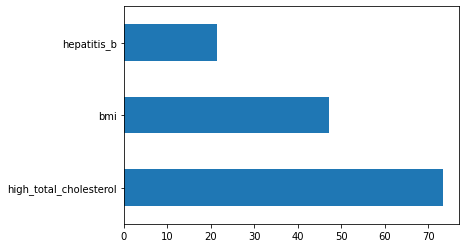

In [22]:
missing = percentage_missing(df)
missing = missing[missing>0]
missing.plot(kind='barh')

Percentage of missing values in each column

In [23]:
missing

high_total_cholesterol    73.372781
bmi                       47.140039
hepatitis_b               21.499014
dtype: float64

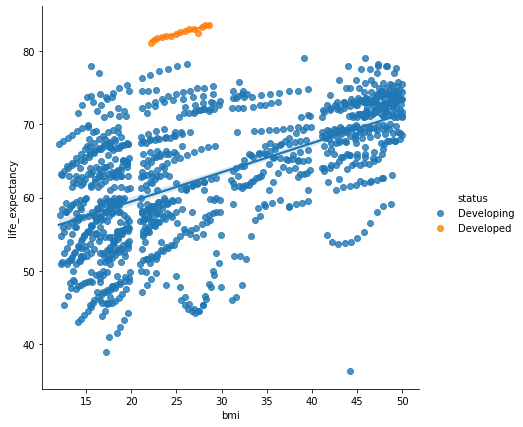

In [24]:
sns.pairplot(df, x_vars=["bmi"], y_vars=["life_expectancy"], hue="status", height=6, kind="reg");

We will drop bmi because:
</br>
i) Over 50% of BMI data is missing </br>
ii) As we can see from the graph above, the relation between life expectancy and BMI is not as expected (life expectancy increases with a country's BMI, rather than increase upto optimal BMI and then decrease) because the BMI is country-wise rather than individual-wise, and a higher BMI represents a country's wealth and ability to procure adequate food, not obesity. </br>
</br>
Because of the above 2 reasons, BMI will not tell us much about a country's life expectancy in this case.

In [25]:
df.drop(columns='bmi', inplace=True)

Also dropping 'high_total_cholesterol' as over 75% of the values are missing

In [26]:
df.drop(columns='high_total_cholesterol', inplace=True)

In [27]:
df.drop(columns='hepatitis_b', inplace=True)

In [28]:
df.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under-five_deaths,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,1154,83,...,32163.22748,8683.697759,1065.783979,5033.485922,434.828046,26033.71841,6780.26,3316.445516,14242.30535,8687.274664
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,492,86,...,31880.46954,8488.531529,1104.609311,4940.224678,425.964780,26251.14460,6414.25,3272.323115,14065.39829,8583.175662
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,430,89,...,31572.44542,8309.869419,1134.042444,5210.263059,421.347745,26468.19931,6438.87,3214.655896,13860.62741,8507.319690
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,2787,93,...,31361.54528,8156.920612,1161.643271,6431.888593,413.903423,26529.23052,6475.42,3152.690488,13698.73490,8454.321712
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,3013,97,...,31297.39118,8046.937583,1202.670796,6435.464674,409.034725,27174.74431,6425.95,3097.710300,13614.03365,8452.451444


In [29]:
missing = percentage_missing(df)
missing

diet_low_in_nuts_and_seeds                  0.0
diet_low_in_whole_grains                    0.0
unsafe_sanitation                           0.0
unsafe_water_source                         0.0
schooling                                   0.0
income_composition_of_resources             0.0
thinness_5-9_years                          0.0
thinness_10-19_years                        0.0
population                                  0.0
gdp                                         0.0
hiv/aids                                    0.0
diphtheria                                  0.0
total_expenditure                           0.0
polio                                       0.0
under-five_deaths                           0.0
measles                                     0.0
percentage_expenditure                      0.0
alcohol                                     0.0
infant_deaths                               0.0
adult_mortality                             0.0
life_expectancy                         

Columns being used further

In [30]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'measles',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_10-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'unsafe_water_source', 'unsafe_sanitation',
       'no_access_to_handwashing_facility',
       'household_air_pollution_from_solid_fuels',
       'non-exclusive_breastfeeding', 'discontinued_breastfeeding',
       'child_wasting', 'child_stunting', 'low_birth_weight_for_gestation',
       'secondhand_smoke', 'alcohol_use', 'drug_use', 'diet_low_in_fruits',
       'diet_low_in_vegetables', 'unsafe_sex', 'low_physical_activity',
       'high_fasting_plasma_glucose', 'high_body-mass_index',
       'high_systolic_blood_pressure', 'smoking', 'iron_deficiency',
       'vitamin_a_deficiency', 'low_bone_mineral_density', 'air_pollutio

In [31]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under-five_deaths,polio,total_expenditure,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
count,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,2028.000000,...,2.028000e+03,2.028000e+03,2028.000000,2028.000000,2028.000000,2.028000e+03,2028.000000,2.028000e+03,2028.000000,2028.000000
mean,2007.026627,68.788166,168.433925,35.651874,4.758402,928.586568,2714.609467,49.630178,81.354536,6.048575,...,4.957596e+04,3.796857e+04,576.480065,3046.119337,1485.169361,2.965507e+04,17370.084374,1.642818e+04,15194.869750,9830.663817
std,4.317366,9.913737,130.071917,137.515394,4.048583,2279.163260,12024.471698,187.206207,23.786255,2.359457,...,1.903329e+05,1.694346e+05,2926.827958,13589.125185,6936.092332,1.384690e+05,89142.852012,1.075885e+05,61409.783460,35648.162784
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,3.000000,1.100000,...,1.037035e+02,2.988068e+01,0.018345,0.026489,0.478305,3.563779e+01,8.270000,1.041593e+01,24.370348,19.114424
25%,2003.000000,62.200000,69.000000,0.000000,1.020000,31.890344,0.000000,1.000000,75.000000,4.407500,...,3.614365e+03,1.566316e+03,2.631343,2.170534,45.896408,1.376865e+03,610.165000,4.446468e+02,905.406988,606.837905
50%,2007.000000,71.600000,146.000000,3.000000,4.135000,130.196761,17.000000,4.000000,92.000000,5.910000,...,9.727073e+03,5.256770e+03,19.149116,57.087322,235.288514,5.144913e+03,2030.020000,1.591401e+03,2883.662705,1960.939005
75%,2011.000000,75.600000,234.000000,24.000000,7.600000,578.729500,460.500000,33.250000,96.000000,7.712500,...,3.069904e+04,1.744523e+04,314.193809,1392.357683,675.531495,1.395231e+04,6783.085000,5.188200e+03,9223.569000,6618.615794
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,212183.000000,2500.000000,99.000000,14.390000,...,2.348707e+06,1.996964e+06,47540.143510,198694.176100,82747.633620,1.236765e+06,970238.110000,1.528510e+06,710482.891400,371446.602400


##EDA and Visualisation

- Does investment directly correspond to Human development Index? Should countries that want to improve life expectancy or HDI increase investments?
- Do all predicting factors (dataset 1 data : until 'Schooling') really affect Life expectancy?
- Does schooling have an impact on life expectancy?
- Does high immunisation help prevent a significant number of child fatalities? Does it have an impact on Life expectancy?
- Are the main causes of death the same in countries with high and low GDP / Health investment?
- Are volumes of deaths caused by smoking / pollution / discontinued breastfeeding / diet and child stunting / child wasting correlated?
- Which factor has had the highest bearing on death across the world over the years?
- Is low physical activity more of a contributing factor towards deaths in developed countries or developing countries? Is it correlated with BMI?
- Have deaths due to Air pollution, smoking, alcohol increased (globally) from 2000 to 2015? Is it the same case in India?
- Have deaths due to deficiencies decreased over time?
- Have deaths due to diets low in fruits, vegetables, whole wheat and nuts decreased over time? Is this related to countries' GDP?
- How is population related to life expectancy?
- Top 5, bottom 5 countries in terms of life expectancy; where does India stand?

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under-five_deaths,polio,total_expenditure,...,high_systolic_blood_pressure,smoking,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds
year,1.000000,0.168649,-0.074023,-0.038832,-0.054985,0.078005,-0.104741,-0.043806,0.097559,0.070100,...,0.021903,0.005141,-0.037737,-0.064308,0.028050,0.001058,0.015705,0.011861,0.015523,0.023950
life_expectancy,0.168649,1.000000,-0.678912,-0.176489,0.447280,0.432716,-0.145099,-0.202611,0.451472,0.243159,...,0.065764,0.079701,-0.138510,-0.216431,0.040386,-0.004127,0.043093,0.063190,0.052487,0.052945
adult_mortality,-0.074023,-0.678912,1.000000,0.051412,-0.232511,-0.267573,-0.000325,0.066292,-0.241686,-0.138815,...,-0.082586,-0.092091,0.038894,0.071646,-0.073236,-0.051304,-0.075269,-0.073986,-0.077630,-0.074311
infant_deaths,-0.038832,-0.176489,0.051412,1.000000,-0.121335,-0.095606,0.507945,0.996739,-0.164949,-0.157282,...,0.570394,0.494923,0.967385,0.957831,0.765665,0.744188,0.612916,0.263225,0.605868,0.700997
alcohol,-0.054985,0.447280,-0.232511,-0.121335,1.000000,0.418007,-0.042337,-0.117063,0.250090,0.251767,...,-0.006652,0.001511,-0.122980,-0.102333,-0.022904,-0.061555,-0.026221,-0.009446,-0.022282,-0.018400
percentage_expenditure,0.078005,0.432716,-0.267573,-0.095606,0.418007,1.000000,-0.066604,-0.098351,0.170822,0.238010,...,-0.033568,-0.018486,-0.075070,-0.086219,-0.016949,-0.058763,-0.039498,-0.030750,-0.043277,-0.041935
measles,-0.104741,-0.145099,-0.000325,0.507945,-0.042337,-0.066604,1.000000,0.517307,-0.121963,-0.117030,...,0.536488,0.539790,0.377977,0.487904,0.505510,0.578087,0.552480,0.481210,0.542138,0.511990
under-five_deaths,-0.043806,-0.202611,0.066292,0.996739,-0.117063,-0.098351,0.517307,1.000000,-0.183185,-0.158051,...,0.537052,0.461489,0.959437,0.972187,0.734759,0.714626,0.581046,0.235014,0.571786,0.666583
polio,0.097559,0.451472,-0.241686,-0.164949,0.250090,0.170822,-0.121963,-0.183185,1.000000,0.167173,...,0.034739,0.045901,-0.141541,-0.206878,0.005455,-0.018466,0.021702,0.048457,0.027084,0.023310
total_expenditure,0.070100,0.243159,-0.138815,-0.157282,0.251767,0.238010,-0.117030,-0.158051,0.167173,1.000000,...,-0.089933,-0.075600,-0.134281,-0.141545,-0.083934,-0.108874,-0.082653,-0.063816,-0.091093,-0.098388


In [34]:
top_countries_by_lifeExpectancy = df.sort_values(by = 'life_expectancy', ascending = False)['country'].unique()[:10]
list(top_countries_by_lifeExpectancy)

['Germany',
 'Norway',
 'France',
 'Finland',
 'Belgium',
 'Portugal',
 'Spain',
 'Italy',
 'Sweden',
 'Netherlands']

In [35]:
bottom_countries_by_lifeExpectancy = df.sort_values(by = 'life_expectancy')['country'].unique()[:10]
list(bottom_countries_by_lifeExpectancy)

['Haiti',
 'Sierra Leone',
 'Malawi',
 'Zambia',
 'Zimbabwe',
 'Lesotho',
 'Angola',
 'Eritrea',
 'Central African Republic',
 'Botswana']

In [37]:
#!pip install dataprep --quiet
from dataprep.eda import create_report

SyntaxError: future feature annotations is not defined (configs.py, line 20)

In [ ]:
report = create_report(df, title='My Report')
report

Extended EDA...

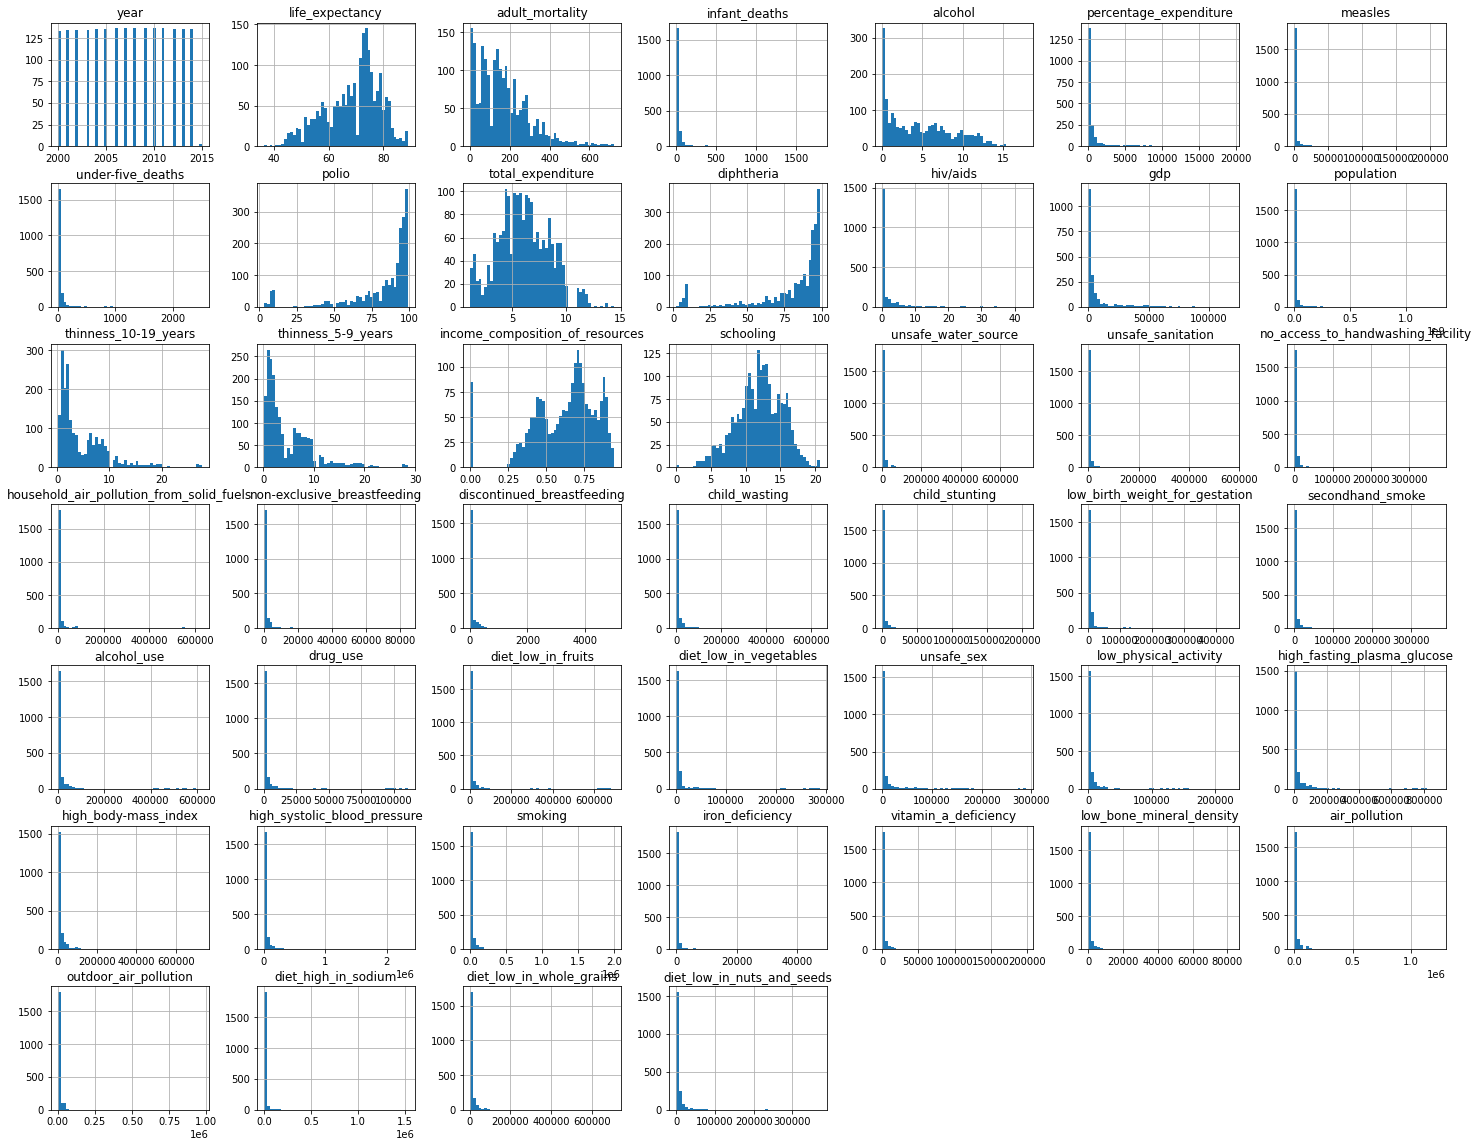

In [38]:
df.hist(bins = 50, figsize = (25,20))
plt.show()

### Feature Engineering

Can columns 'country', 'year', and 'status' can be dropped?
- There is no point of a prediction model of life expectancy on the basis of country, as life expectancy should be based on other socio-economic factors. Hence, 'country' can be dropped.
- T-tests can be used to check if 'year' and 'status' are significant predictors of life expectancy

Are 'year' and 'status' significant predictors of Life Expectancy?

C:\Users\godbo\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


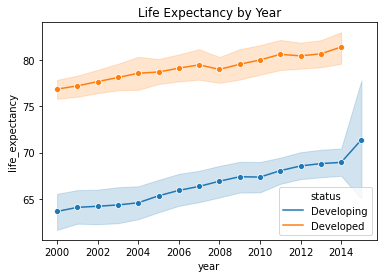

In [39]:
sns.lineplot('year', 'life_expectancy', data=df, marker='o',hue="status")
plt.title('Life Expectancy by Year')
plt.show()

From the graph, it can be observed that there seems to be a small increase in life-expectancy with time (in years), and that there seems to be quite a significant difference between life-exptancy and status.

In [40]:
df['life_expectancy'].corr(df['year'])

0.16864869808594754

As we can see from the EDA report above, life expectancy is not severly skewed; using the T-test to find if 'year' and 'status' are significant predictors of life expectancy:

In [41]:
years = list(df.year.unique())
years.sort()
yearly_le = {}
for year in years:
    year_data = df[df['year'] == year].life_expectancy
    yearly_le[year] = year_data
for i in range(0, len(years[:-5]), 5):
    print(str(years[i]) + '->' + str(years[i]+5))
    t_stat, p = stats.ttest_ind(yearly_le[years[i]], yearly_le[years[i]+5], equal_var=False)
    print('P value:', p)
    print()

2000->2005
P value: 0.18720235170336214

2005->2010
P value: 0.11942083726677687

2010->2015
P value: 0.8423175293719407



As we can see from the above P-values, we failed to reject the null hypothesis that there is no relationship between life expectancy and year. Therefore, 'year' can be dropped from predictions.

In [42]:
developing_list = df[df.status == 'Developing']['life_expectancy']
developed_list = df[df.status == 'Developed']['life_expectancy']
t_stat, p = stats.ttest_ind(developing_list, developed_list, equal_var=False)
print('P-value:', p)

P-value: 5.828483709289965e-249


Going by this P-value, we can assume that the relationship between status and life-expectancy is extremely significant, and 'status' cannot be ignored while making predictions.

We need to retain status as a predictor for our regressor model, but 'status' is a categorical (string) variable, so we will do one-hot encoding and use dummy variables 0 and 1 to represent 'Developed' or 'Developing' in two separate columns.

In [43]:
status_dummy=pd.get_dummies(df['status'])
df_numeric_data = df.drop(columns=["year","country", "status"])
df_numeric_data = pd.concat([df_numeric_data, status_dummy], axis=1)
df_numeric_data.iloc[:10, :]

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under-five_deaths,polio,total_expenditure,diphtheria,...,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds,Developed,Developing
0,65.0,263.0,62,0.01,71.279624,1154,83,6.0,8.16,65.0,...,1065.783979,5033.485922,434.828046,26033.71841,6780.26,3316.445516,14242.30535,8687.274664,0,1
1,59.9,271.0,64,0.01,73.523582,492,86,58.0,8.18,62.0,...,1104.609311,4940.224678,425.964780,26251.14460,6414.25,3272.323115,14065.39829,8583.175662,0,1
2,59.9,268.0,66,0.01,73.219243,430,89,62.0,8.13,64.0,...,1134.042444,5210.263059,421.347745,26468.19931,6438.87,3214.655896,13860.62741,8507.319690,0,1
3,59.5,272.0,69,0.01,78.184215,2787,93,67.0,8.52,67.0,...,1161.643271,6431.888593,413.903423,26529.23052,6475.42,3152.690488,13698.73490,8454.321712,0,1
4,59.2,275.0,71,0.01,7.097109,3013,97,68.0,7.87,68.0,...,1202.670796,6435.464674,409.034725,27174.74431,6425.95,3097.710300,13614.03365,8452.451444,0,1
5,58.8,279.0,74,0.01,79.679367,1989,102,66.0,9.20,66.0,...,1232.393129,6700.007590,406.253719,27754.10987,6154.12,3049.005496,13534.73962,8438.243774,0,1
6,58.6,281.0,77,0.01,56.762217,2861,106,63.0,9.42,63.0,...,1285.236226,7708.535110,399.237836,28432.97534,6112.64,3019.912793,13579.13506,8507.719886,0,1
7,58.1,287.0,80,0.03,25.873925,1599,110,64.0,8.33,64.0,...,1325.675841,7329.675210,395.294815,29696.64329,6123.82,2995.320943,13640.89261,8597.317493,0,1
8,57.5,295.0,82,0.02,10.910156,1141,113,63.0,6.73,63.0,...,1334.176719,6972.441063,392.337367,31145.72826,6204.82,2971.581700,13631.42558,8625.936713,0,1
9,57.3,295.0,84,0.03,17.171518,1990,116,58.0,7.43,58.0,...,1342.583874,7323.419562,391.258101,32759.43955,6202.75,2964.409777,13729.95319,8718.309024,0,1


Doing the T-test for other variables (relation with life-expectancy):

In [44]:
for col in df_numeric_data.columns[1:]:
    print('T-test:',str(col), 'v/s Life-expectancy')
    p = str(stats.ttest_ind(df_numeric_data['life_expectancy'], df_numeric_data[col], equal_var=False)[1])
    p = float(p)
    print('P-value:', p)
    print('   --> Null-hypothesis rejected?:', p <= 0.05)
    print()

T-test: adult_mortality v/s Life-expectancy
P-value: 4.080565110616258e-205
   --> Null-hypothesis rejected?: True

T-test: infant_deaths v/s Life-expectancy
P-value: 1.3780227117728957e-26
   --> Null-hypothesis rejected?: True

T-test: alcohol v/s Life-expectancy
P-value: 0.0
   --> Null-hypothesis rejected?: True

T-test: percentage_expenditure v/s Life-expectancy
P-value: 1.2824795309840702e-60
   --> Null-hypothesis rejected?: True

T-test: measles v/s Life-expectancy
P-value: 1.2329756587295776e-22
   --> Null-hypothesis rejected?: True

T-test: under-five_deaths v/s Life-expectancy
P-value: 4.440016050160619e-06
   --> Null-hypothesis rejected?: True

T-test: polio v/s Life-expectancy
P-value: 1.6398909854241527e-98
   --> Null-hypothesis rejected?: True

T-test: total_expenditure v/s Life-expectancy
P-value: 0.0
   --> Null-hypothesis rejected?: True

T-test: diphtheria v/s Life-expectancy
P-value: 1.553085652883572e-101
   --> Null-hypothesis rejected?: True

T-test: hiv/aids 

From the above t-tests of life-expectancy with all other features, we observe that there is a signficant statistical relationship with all of them. We have to use dimensionality reduction techniques to reduce the number of predictors for our regressor model.

Train-test data split:

In [45]:
from sklearn.model_selection import train_test_split

x, y = df_numeric_data.iloc[:, 1:], df_numeric_data.iloc[:, 0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

y_train.shape, y_test.shape

((1622,), (406,))

### Dealing with Outliers

In [46]:
for col in df.columns[3:]:
    q25, q75 = np.percentile(df[col], [25 ,75])
    iqr = q75 - q25

    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    outliers = len(np.where((df[col] > max) | (df[col] < min))[0])
    print("No. of outliers, % of {} : {} and {}".format(col, outliers, outliers*100/len(df[col])))

No. of outliers, % of life_expectancy : 4 and 0.19723865877712032
No. of outliers, % of adult_mortality : 62 and 3.057199211045365
No. of outliers, % of infant_deaths : 203 and 10.009861932938856
No. of outliers, % of alcohol : 1 and 0.04930966469428008
No. of outliers, % of percentage_expenditure : 276 and 13.609467455621301
No. of outliers, % of measles : 377 and 18.58974358974359
No. of outliers, % of under-five_deaths : 254 and 12.52465483234714
No. of outliers, % of polio : 161 and 7.938856015779093
No. of outliers, % of total_expenditure : 5 and 0.2465483234714004
No. of outliers, % of diphtheria : 209 and 10.305719921104536
No. of outliers, % of hiv/aids : 324 and 15.976331360946746
No. of outliers, % of gdp : 286 and 14.102564102564102
No. of outliers, % of population : 254 and 12.52465483234714
No. of outliers, % of thinness_10-19_years : 75 and 3.698224852071006
No. of outliers, % of thinness_5-9_years : 79 and 3.8954635108481264
No. of outliers, % of income_composition_of_re

Winsorization to deal with outliers: Squashes data according to specified percentile
Eg: All data above 95th percentile is made to be equal to the 95th percentile; All data below 5th percentile is made to be equal to the 5th percentile

Note: Winsorization percentile for each feature has been found individually, experimentally by observing the box-plot, because each feature is different from the others and has different percentage of outliers from others.







In [47]:
def train_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(x_train[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(x_train[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(x_test[col], limits=(lower_limit, upper_limit))
    wins_dict_test[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(x_train[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

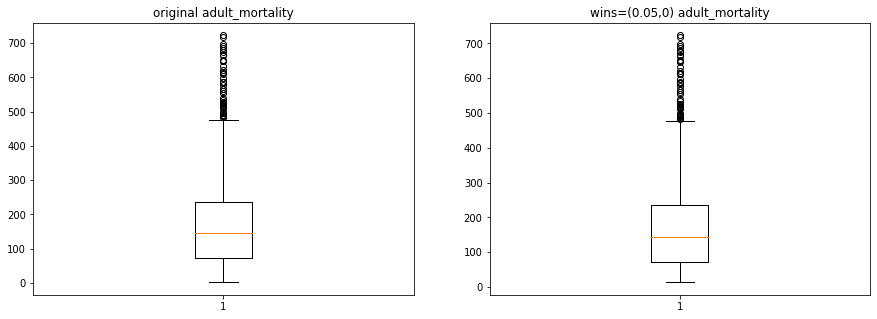

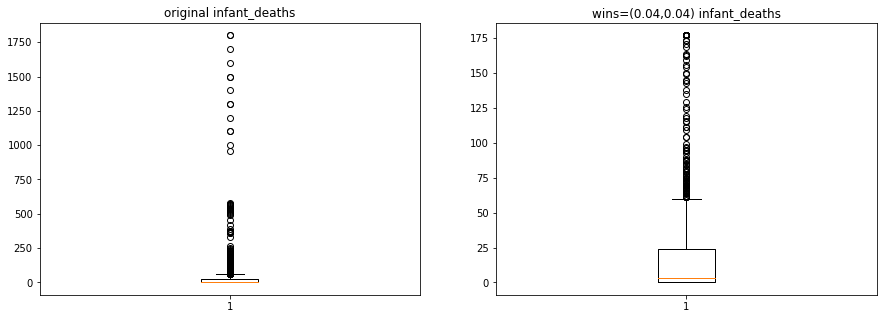

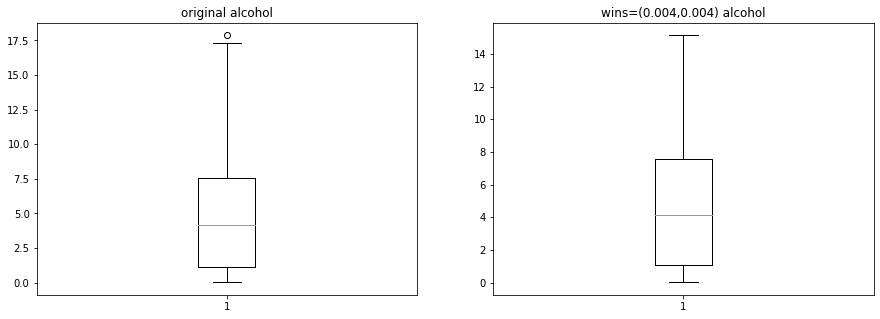

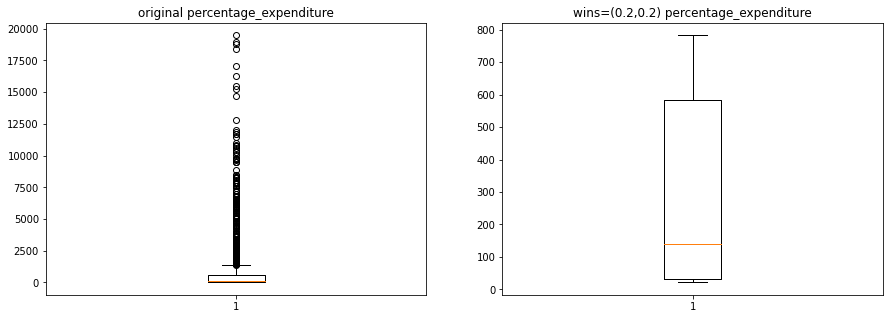

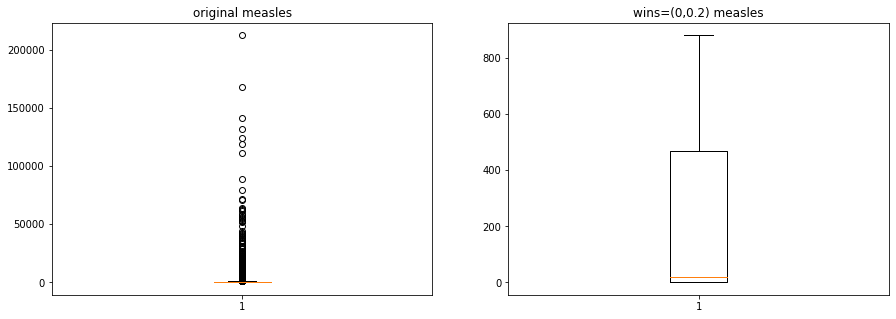

In [48]:
cont_vars_train = list(x_train)
wins_dict = {}
train_wins(cont_vars_train[0], lower_limit=.05, show_plot=True)
train_wins(cont_vars_train[1], lower_limit=.04, upper_limit=.04, show_plot=True)
train_wins(cont_vars_train[2], lower_limit=.004, upper_limit=.004, show_plot=True)
train_wins(cont_vars_train[3], lower_limit=.2, upper_limit=.2, show_plot=True)
train_wins(cont_vars_train[4], upper_limit=.2, show_plot=True)
train_wins(cont_vars_train[5], upper_limit=.03, show_plot=False)
train_wins(cont_vars_train[6], lower_limit=.1, show_plot=False)
train_wins(cont_vars_train[7], upper_limit=.005, show_plot=False)
train_wins(cont_vars_train[8], lower_limit=.07, show_plot=False)
train_wins(cont_vars_train[9], upper_limit=.05, show_plot=False)
train_wins(cont_vars_train[10], upper_limit=.05, show_plot=False)
train_wins(cont_vars_train[11], lower_limit=.05, show_plot=False)
train_wins(cont_vars_train[12], lower_limit=.1, upper_limit=.01, show_plot=False)
train_wins(cont_vars_train[13], lower_limit=.1, upper_limit=.01, show_plot=False)
train_wins(cont_vars_train[14], lower_limit=.05, show_plot=False)
train_wins(cont_vars_train[15], lower_limit=.03, show_plot=False)
train_wins(cont_vars_train[16], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[17], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[18], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[19], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[20], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[21], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[22], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[23], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[24], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[25], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[26], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[27], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[28], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[29], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[30], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[31], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[32], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[33], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[34], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[35], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[36], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[37], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[38], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[39], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[40], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[41], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[42], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[43], lower_limit=.025, upper_limit=.025, show_plot=False)
train_wins(cont_vars_train[44], show_plot=False)
train_wins(cont_vars_train[45], show_plot=False) 

In [49]:
cont_vars = list(x_test)
wins_dict_test = {}
test_wins(cont_vars[0], lower_limit=.05, show_plot=False)
test_wins(cont_vars[1], lower_limit=.04, upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], lower_limit=.004, upper_limit=.004, show_plot=False)
test_wins(cont_vars[3], lower_limit=.2, upper_limit=.2, show_plot=False)
test_wins(cont_vars[4], upper_limit=.2, show_plot=False)
test_wins(cont_vars[5], upper_limit=.03, show_plot=False)
test_wins(cont_vars[6], lower_limit=.1, show_plot=False)
test_wins(cont_vars[7], upper_limit=.005, show_plot=False)
test_wins(cont_vars[8], lower_limit=.07, show_plot=False)
test_wins(cont_vars[9], upper_limit=.05, show_plot=False)
test_wins(cont_vars[10], upper_limit=.05, show_plot=False)
test_wins(cont_vars[11], lower_limit=.05, show_plot=False)
test_wins(cont_vars[12], lower_limit=.1, upper_limit=.01, show_plot=False)
test_wins(cont_vars[13], lower_limit=.1, upper_limit=.01, show_plot=False)
test_wins(cont_vars[14], lower_limit=.05, show_plot=False)
test_wins(cont_vars[15], lower_limit=.03, show_plot=False)
test_wins(cont_vars[16], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[18], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[19], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[20], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[21], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[22], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[23], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[24], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[25], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[26], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[27], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[28], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[29], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[30], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[31], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[32], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[33], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[34], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[35], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[36], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[37], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[38], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[39], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[40], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[41], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[42], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[43], lower_limit=.025, upper_limit=.025, show_plot=False)
test_wins(cont_vars[44], show_plot=False)
test_wins(cont_vars[45], show_plot=False)

The range of life expectancy in the dataset ranges from about 35 to 89, which seems unrealistic because the actual minimum dataset (throughout the years for which information is contained in the dataset) does not go below 45 years, or above 85 years. Winsorizing the life-expectancy to align with real-world statistics:

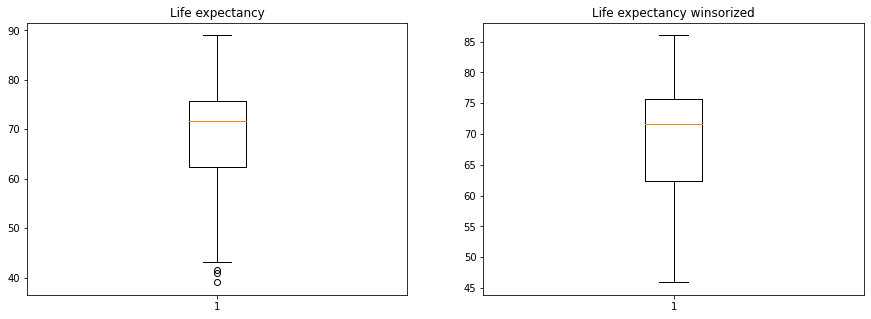

In [50]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.boxplot(y_train)
plt.title('Life expectancy')
wins_ytrain = winsorize(y_train, limits=(0.015, 0.015))
plt.subplot(122)
plt.boxplot(wins_ytrain)
plt.title('Life expectancy winsorized')
plt.show()

y_train = wins_ytrain

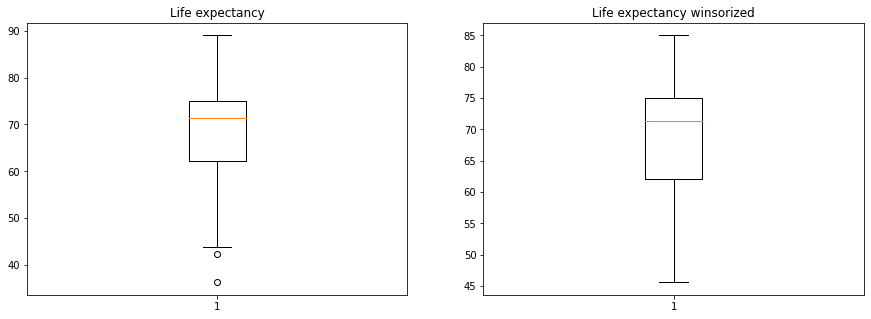

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.boxplot(y_test)
plt.title('Life expectancy')
wins_ytest = winsorize(y_test, limits=(0.015, 0.015))
plt.subplot(122)
plt.boxplot(wins_ytest)
plt.title('Life expectancy winsorized')
plt.show()

y_test = wins_ytest

Checking if the range of life-expectancy data is now aligned with the real-world life-expectancy range: </br>
Actual real world maximum : 85 (approx) </br>
Actual real world minimum : 50 (approx)

In [52]:
print('Maximum life expectancy in training data:', y_train.max())
print('Minimum life expectancy in training data:', y_train.min())

Maximum life expectancy in training data: 86.0
Minimum life expectancy in training data: 45.9


In [53]:
x_tr_wins = pd.DataFrame()
for col in cont_vars_train:
    x_tr_wins[col] = wins_dict[col]
x_tr_wins

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,...,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds,Developed,Developing
0,13.0,0,12.03,337.102352,3,0,96.0,1.42,96.0,0.1,...,2.927014,2.045398,390.248531,4931.891411,4726.17,2226.457647,5269.328644,2791.687446,1,0
1,363.0,30,2.47,184.364910,881,45,52.0,4.41,83.0,6.8,...,181.167505,2388.920591,271.401005,7202.475792,1514.86,1072.346993,1502.016487,1325.630425,0,1
2,148.0,49,7.55,782.598714,2,54,96.0,8.26,95.0,0.1,...,589.701914,1208.315509,6226.296256,64967.764220,50839.58,46628.359320,54408.583460,42836.417010,0,1
3,48.0,177,9.58,21.465313,881,360,52.0,3.25,36.0,5.1,...,5770.159616,23263.202920,2527.809139,122724.300800,41874.63,3888.049962,18267.018890,9946.751844,0,1
4,219.0,55,4.61,24.589734,881,69,84.0,4.56,89.0,0.1,...,396.076753,2686.154197,1344.963064,64345.063820,22215.84,40362.114340,32124.366020,26435.522400,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,55.0,0,9.99,782.598714,621,0,96.0,11.21,96.0,0.1,...,1.046072,0.691850,845.684349,2589.543159,2601.35,1954.989716,2973.726498,1808.776690,1,0
1618,281.0,10,3.88,40.033441,1,14,79.0,11.83,75.0,2.4,...,269.778704,570.609793,67.995321,2381.049839,151.57,204.902138,700.870813,491.145194,0,1
1619,446.0,99,10.09,44.526140,22,155,59.0,9.36,64.0,8.7,...,675.851954,2528.637263,519.593111,15871.773800,2699.00,2398.747680,3475.016049,1952.433325,0,1
1620,13.0,0,4.82,38.254141,17,0,91.0,8.28,87.0,0.1,...,0.854365,1.061164,62.056627,3282.527727,1908.80,2333.591411,2600.563866,1864.621626,0,1


In [54]:
x_train

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,...,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds,Developed,Developing
1912,9.0,0,12.03,337.102352,3,0,96.0,1.42,96.0,0.1,...,2.927014,2.045398,390.248531,4931.891411,4726.17,2226.457647,5269.328644,2791.687446,1,0
2567,363.0,30,2.47,184.364910,15754,45,8.0,4.41,83.0,6.8,...,181.167505,2388.920591,271.401005,7202.475792,1514.86,1072.346993,1502.016487,1325.630425,0,1
339,148.0,49,7.55,843.194626,2,54,96.0,8.26,95.0,0.1,...,589.701914,1208.315509,6743.813338,64967.764220,50839.58,46628.359320,54408.583460,42836.417010,0,1
1760,48.0,574,9.58,15.830985,168107,936,36.0,3.25,27.0,5.1,...,6643.990971,87629.506450,2527.809139,137596.116900,41874.63,3888.049962,18267.018890,9946.751844,0,1
1876,219.0,55,4.61,24.589734,2920,69,84.0,4.56,89.0,0.1,...,396.076753,2686.154197,1344.963064,64345.063820,22215.84,40362.114340,32124.366020,26435.522400,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2310,55.0,0,9.99,18822.867320,621,0,96.0,11.21,96.0,0.1,...,1.046072,0.691850,845.684349,2589.543159,2601.35,1954.989716,2973.726498,1808.776690,1,0
1368,281.0,10,3.88,40.033441,1,14,79.0,11.83,75.0,2.4,...,269.778704,570.609793,67.995321,2381.049839,151.57,204.902138,700.870813,491.145194,0,1
2460,446.0,99,10.09,44.526140,22,155,59.0,9.36,64.0,8.7,...,675.851954,2528.637263,519.593111,15871.773800,2699.00,2398.747680,3475.016049,1952.433325,0,1
313,1.0,0,4.82,38.254141,17,0,91.0,8.28,87.0,0.1,...,0.854365,1.061164,62.056627,3282.527727,1908.80,2333.591411,2600.563866,1864.621626,0,1


In [55]:
x_te_wins = pd.DataFrame()
for col in cont_vars:
    x_te_wins[col] = wins_dict_test[col]
x_te_wins

,adult_mortality,infant_deaths,alcohol,percentage_expenditure,measles,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,...,iron_deficiency,vitamin_a_deficiency,low_bone_mineral_density,air_pollution,outdoor_air_pollution,diet_high_in_sodium,diet_low_in_whole_grains,diet_low_in_nuts_and_seeds,Developed,Developing
0,382.0,92,5.04,98.191451,258,148,45.0,4.10,38.0,2.6,...,966.900736,8367.225993,251.024669,15901.986050,3185.45,1233.793926,3462.885181,2083.365760,0,1
1,58.0,0,7.20,664.473897,6,0,98.0,9.47,98.0,0.1,...,0.767352,0.788880,802.266347,2751.619753,2715.60,3269.091915,5132.618911,3866.591154,1,0
2,144.0,4,0.53,210.241700,1088,5,95.0,3.40,96.0,0.1,...,80.883280,46.607604,418.193579,7755.114906,6882.49,11667.784520,7206.428491,5646.331942,0,1
3,143.0,44,1.54,421.295660,1088,54,85.0,4.95,85.0,0.1,...,259.070172,2230.463782,1024.639619,31851.464390,28658.58,8090.767261,25905.321440,15257.881070,0,1
4,185.0,98,0.08,211.878340,1088,161,81.0,2.71,81.0,0.3,...,2314.132120,8728.125254,6314.192364,114453.651400,46087.03,78641.767010,69554.964600,45294.088540,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,81.0,1,9.68,664.473897,3,1,97.0,8.34,97.0,0.1,...,5.335825,1.865660,942.140739,8175.682156,8232.35,3510.930773,6805.678097,4633.141929,1,0
402,297.0,22,0.01,41.251590,0,32,95.0,7.54,95.0,0.7,...,221.050813,1188.551030,205.161972,6360.932762,1048.32,680.711959,1778.366284,1008.628167,0,1
403,235.0,7,6.64,664.473897,0,8,99.0,4.13,98.0,0.1,...,31.777786,96.773323,242.824128,9426.566838,6406.00,10709.356580,15002.475730,9431.667062,0,1
404,328.0,98,1.22,23.945071,1088,188,59.0,4.47,46.0,3.3,...,2314.132120,13447.050360,1509.367540,57182.672830,6011.27,5640.366864,12277.665550,7006.830486,0,1


### Principal Component Analysis for dimensionality reduction
Information retained for upto 99% variance explained

In [56]:
from sklearn.preprocessing import StandardScaler

pca = PCA(.99) 

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_tr_wins)
x_test_std = scaler.transform(x_te_wins)
pca.fit(x_train_std)
x_tr = pca.transform(x_train_std)
x_te = pca.transform(x_test_std)
print('Explained variance by principal components:', pca.explained_variance_ratio_)
print('Original number of components:', len(x_train.columns))
print('Number of principal components:', pca.explained_variance_ratio_.shape[0])

Explained variance by principal components: [0.48289441 0.2016239  0.06944545 0.03767212 0.0282426  0.02553408
 0.01983378 0.01797692 0.01665905 0.01403482 0.01288948 0.00919661
 0.00883495 0.00693039 0.00619739 0.0056246  0.00504763 0.00458025
 0.00428472 0.00347952 0.00301103 0.0023906  0.00221302 0.00205941]
Original number of components: 46
Number of principal components: 24


### Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

lr_regressor = LinearRegression()
lr_regressor.fit(x_tr,y_train)
y_pred_lr = lr_regressor.predict(x_te)
y_pred_arr = np.array(y_pred_lr)
y_test_arr = np.array(y_test)
#comparison = np.concatenate((y_pred_arr.reshape(len(y_test_arr),1), y_test_arr.reshape(len(y_test_arr),1)),1)
comp_lr = pd.DataFrame({'index': [i for i in range(len(y_test))], 'actual': y_test, 'predicted': y_pred_lr, 'model': ['linear_regression']*len(y_test)})
lr_regressor.score(x_te, y_test)

0.891839701590556

In [58]:
print(lr_regressor.coef_)
print(lr_regressor.intercept_)

[-0.47867027  2.47418989  1.21748092 -2.73820698  0.3036045   0.46724869
  1.22979441  0.25179446 -0.74746623  0.93853548 -0.06038508 -0.60937544
  0.87837786  2.20636473  0.11074192 -1.29581149  0.01761757  0.5012823
  0.27029704 -0.53157159  0.09004315  0.43968695  0.53992837  1.17015452]
68.8740443896424


In [60]:
import statsmodels.api as sm
X = sm.add_constant(x_tr)
results = sm.OLS(y_train, X).fit()
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=array([[547.36490923]]), p=0.0, df_denom=1.6e+03, df_num=24>


In [61]:
print(comp_lr)

     index  actual  predicted              model
0        0    47.4  55.171924  linear_regression
1        1    81.5  80.616011  linear_regression
2        2    72.7  71.175597  linear_regression
3        3    74.0  70.941911  linear_regression
4        4    68.3  71.261561  linear_regression
..     ...     ...        ...                ...
401    401    78.4  81.276504  linear_regression
402    402    59.1  63.863944  linear_regression
403    403    67.8  74.127072  linear_regression
404    404    57.2  52.453596  linear_regression
405    405    52.8  53.228427  linear_regression

[406 rows x 4 columns]


In [62]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_test, y_pred_lr)))

Root Mean Squared Error (RMSE): 3.232679734853123


In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_regressor,x_tr,y_train,cv=10)
scores.mean()

0.8878005388529477

### Decision Tree Regression

In [64]:
values = [i for i in range(1, 40)]
for i in values:
  from sklearn.tree import DecisionTreeRegressor  
  dt_regressor = DecisionTreeRegressor(max_depth=i)        
  dt_regressor.fit(x_tr,y_train)              
  y_pred_dt = dt_regressor.predict(x_te) 
  y_pred_arr = np.array(y_pred_dt)
  y_test_arr = np.array(y_test)

  print(i, dt_regressor.score(x_te, y_test))

1 0.637346287003882
2 0.7309642309524627
3 0.7893980813074359
4 0.8382442569239801
5 0.8533867297970341
6 0.8732313226206845
7 0.8862087619850421
8 0.8838476491433379
9 0.8890375819975447
10 0.8848948181390475
11 0.8853614377837509
12 0.8774707417160095
13 0.8758990124499241
14 0.8904351875052265
15 0.8830028181049459
16 0.8789434152013467
17 0.8887958007965513
18 0.8793896723322379
19 0.8824599630034244
20 0.8816642636157197
21 0.8814243257420834
22 0.8838715586455137
23 0.8814851039223365
24 0.8880298403749733
25 0.8759966944734587
26 0.8727308198140027
27 0.8873865948645159
28 0.8813960563723953
29 0.8862656791766204
30 0.8809767008330304
31 0.8822684178652264
32 0.8808645327860269
33 0.8856416169514743
34 0.8795108684005994
35 0.8800610016856752
36 0.884502346492251
37 0.8861932798008273
38 0.8864757393373722
39 0.878662725008826


In [65]:
from sklearn.tree import DecisionTreeRegressor  
dt_regressor = DecisionTreeRegressor(max_depth=9)        
dt_regressor.fit(x_tr,y_train)              
y_pred_dt = dt_regressor.predict(x_te) 
y_pred_arr = np.array(y_pred_dt)
y_test_arr = np.array(y_test)
#comparison = np.concatenate((y_pred_arr.reshape(len(y_test_arr),1), y_test_arr.reshape(len(y_test_arr),1)),1)
comp_dt = pd.DataFrame({'index': [i for i in range(len(y_test))], 'actual': y_test, 'predicted': y_pred_dt, 'model': ['decision_tree']*len(y_test)})

print(i, dt_regressor.score(x_te, y_test))

39 0.8874384601762992


Comparison of predicted and actual values

In [66]:
print(comp_dt)

     index  actual  predicted          model
0        0    47.4  47.100000  decision_tree
1        1    81.5  81.867320  decision_tree
2        2    72.7  73.377987  decision_tree
3        3    74.0  73.377987  decision_tree
4        4    68.3  67.933333  decision_tree
..     ...     ...        ...            ...
401    401    78.4  81.867320  decision_tree
402    402    59.1  62.655769  decision_tree
403    403    67.8  72.775000  decision_tree
404    404    57.2  53.233333  decision_tree
405    405    52.8  53.318182  decision_tree

[406 rows x 4 columns]


In [67]:
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_test, y_pred_dt)))

Root Mean Squared Error (RMSE): 3.297795758388955


In [68]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_regressor,x_tr,y_train,cv=10)
scores.mean()

0.8661894904388712

### Random Forest Regression

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_regressor.fit(x_tr, y_train)
y_pred_rf = rf_regressor.predict(x_te)
y_pred_arr = np.array(y_pred_rf)
y_test_arr = np.array(y_test)
comp_rf = pd.DataFrame({'index': [i for i in range(len(y_test))], 'actual': y_test, 'predicted': y_pred_rf, 'model': ['random_forest']*len(y_test)})
rf_regressor.score(x_te,y_test)

0.9358291852303195

Comparison of predicted and actual values

In [70]:
print(comp_rf)

     index  actual  predicted          model
0        0    47.4     51.506  random_forest
1        1    81.5     81.348  random_forest
2        2    72.7     72.209  random_forest
3        3    74.0     71.561  random_forest
4        4    68.3     69.111  random_forest
..     ...     ...        ...            ...
401    401    78.4     80.627  random_forest
402    402    59.1     60.995  random_forest
403    403    67.8     71.601  random_forest
404    404    57.2     53.677  random_forest
405    405    52.8     51.922  random_forest

[406 rows x 4 columns]


In [71]:
print('Root Mean Squared Error (RMSE):', sqrt(mean_squared_error(y_test, y_pred_rf)))

Root Mean Squared Error (RMSE): 2.4899895191383252


In [72]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_regressor,x_tr,y_train,cv=10)
scores.mean()

0.9364514706008235

### Comparison of different regression models

In [73]:
result = comp_rf.merge(comp_dt, on=['index','actual'], how='inner', suffixes=('_1', '_2'))
result = result.merge(comp_lr, on=['index','actual'], how='inner', suffixes=('_1', '_2'))

result[1:]

,index,actual,predicted_1,model_1,predicted_2,model_2,predicted,model
1,1,81.5,81.348,random_forest,81.867320,decision_tree,80.616011,linear_regression
2,2,72.7,72.209,random_forest,73.377987,decision_tree,71.175597,linear_regression
3,3,74.0,71.561,random_forest,73.377987,decision_tree,70.941911,linear_regression
4,4,68.3,69.111,random_forest,67.933333,decision_tree,71.261561,linear_regression
5,5,51.7,53.409,random_forest,51.500000,decision_tree,59.927230,linear_regression
...,...,...,...,...,...,...,...,...
401,401,78.4,80.627,random_forest,81.867320,decision_tree,81.276504,linear_regression
402,402,59.1,60.995,random_forest,62.655769,decision_tree,63.863944,linear_regression
403,403,67.8,71.601,random_forest,72.775000,decision_tree,74.127072,linear_regression
404,404,57.2,53.677,random_forest,53.233333,decision_tree,52.453596,linear_regression


C:\Users\godbo\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\godbo\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\godbo\anaconda3\envs\deep_learning\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mis

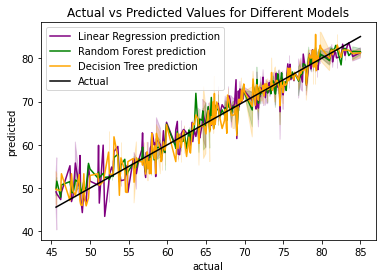

In [74]:
sns.lineplot('actual', 'predicted', data=result, marker='', color='purple',label="Linear Regression prediction") #linear regression
sns.lineplot('actual', 'predicted_1', data=result, marker='', color='green', label='Random Forest prediction') #random forest
sns.lineplot('actual', 'predicted_2', data=result, marker='', color='orange', label='Decision Tree prediction') #decision tree

sns.lineplot('actual', 'actual', data=result, marker='', color='black', label='Actual') #actual

plt.title('Actual vs Predicted Values for Different Models')
plt.show()

Note: The observations below use inferences drawn from the graph plotted above (for a 80:20 split). The graph when plotted for a 75:25 split highlights overfitting issues better.
</br> </br>
Linear Regression: After PCA, a multiple linear regression model was modelled, but this model did not prove to be a good fit for the data. The linear regression model does not perform as well as the Random Forest regressor possibly because of underfitting; in general, it does not perform well with skewed data and outliers (too much variability).

The Decision Tree does not perform as well as the Random forest regressor, possibly because of overfitting (as seen in graph above). It was observed that the Decision tree performed extremely well on a subset of the training data, but did not perform well on the test data despite varying the depth. Further, we try Random Forest regression (an ensemble of Decision Trees) to attempt to overcome the pitfalls of Decision trees.

The Random Forest regressor performed well on subsets of the training data, as well on the test data. Experimentally, it was found that the model performed best with 100 estimators. Since a Random Forest regressors cannot view all the data at once, it seems to have overcome the problem of overfitting. The model resulted in a minimum RMSE value of 2.4, which is reasonably fair, considering the variabliity in both independent and target variables (life-expectancy) in the dataset.

In [121]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge

def return_params_score(regressor, grid, cv=10):
    ridge = regressor
    ridge_cv = GridSearchCV(ridge, grid, cv=cv)
    ridge_cv.fit(x_tr, y_train)
    y_pred_ridge = ridge_cv.predict(x_te)
    y_pred_arr = np.array(y_pred_ridge)
    y_test_arr = np.array(y_test)

    comp_en = pd.DataFrame({'index': [i for i in range(len(y_test))], 'actual': y_test, 'predicted': y_pred_ridge, 'model': ['BayesianRidge']*len(y_test)})
    score = ridge_cv.score(x_te,y_test)
    #print(score)
    return ridge_cv.best_score_, ridge_cv.best_params_

In [123]:
grid={'alpha_1': [0.0000001, 0.000001],
          'alpha_2': [0.00001, 0.0001],
          'n_iter': [100, 250, 500],
          'tol': [0.25, 0.15, 0.1, 0.01],
          'lambda_1': [0.00001, 0.0001], 
          'lambda_2': [0.0000001, 0.000001]}
bayesianridge = return_params_score(BayesianRidge(), grid)
print("BayesianRidge: \n", bayesianridge)

grid={'alpha': [0.01, 0.25, 0.5, 1],
      'max_iter': [250, 500, 1000, 1500],
      'tol': [0.1, 0.01, 0.001, 0.0001],
      'warm_start': [True]}
lasso = return_params_score(Lasso(), grid)
print("Lasso: \n", lasso)


grid = {'alpha': [0.025, 0.05, 0.1, 0.15],
        'l1_ratio': [0.025, 0.05, 0.1, 0.15],
        'fit_intercept': [True, False],
        'max_iter': [25, 50, 75, 100, 15]}
elasticnet = return_params_score(ElasticNet(), grid)
print("ElasticNet: \n", elasticnet)

grid = {'alpha': [0.5, 1, 2, 5, 10, 20],
         'solver': ['auto', 'svd','sag', 'saga']}
ridge = return_params_score(Ridge(), grid)
print("Ridge: \n", ridge)

BayesianRidge: 
 (0.8878329465853809, {'alpha_1': 1e-07, 'alpha_2': 0.0001, 'lambda_1': 0.0001, 'lambda_2': 1e-07, 'n_iter': 100, 'tol': 0.25})
Lasso: 
 (0.8877416917113028, {'alpha': 0.01, 'max_iter': 250, 'tol': 0.0001, 'warm_start': True})
ElasticNet: 
 (0.8876930483444617, {'alpha': 0.025, 'fit_intercept': True, 'l1_ratio': 0.025, 'max_iter': 25})
Ridge: 
 (0.8878365669902314, {'alpha': 10, 'solver': 'sag'})
